In [11]:
#Import the usual library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random

# Inferential Statistics

1. T test single population mean
1. T test independence double population mean
    1. equal variance
    1. non equal variance
1. T test paired 
1. F test for more than two population mean
1. Proportion Test

## One-Way ANOVA
Let's create the dataset

In [12]:
transport = []
method = ['Walking ', 'Public ', 'Private ']
for i in method:
    transport.extend((i*10).split())

In [13]:
transportdf = pd.concat([pd.Series(transport, name = 'Transportation'), 
                     pd.Series([5,4,5,6,5,3,2,4,5,5,7,7,5,6,4,6,5,5,6,7,5,4,5,6,6,5,5,5,7,7], name = 'Study Hour')], axis =1)
transportdf.sample(5)

,Transportation,Study Hour
29,Private,7
11,Public,7
21,Private,4
1,Walking,4
0,Walking,5


Text(0, 0.5, 'Frequency')

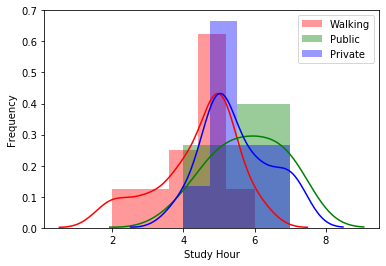

In [14]:
sns.distplot(transportdf[transportdf['Transportation'] == 'Walking']['Study Hour'], color = 'red', label = 'Walking')
sns.distplot(transportdf[transportdf['Transportation'] == 'Public']['Study Hour'], color = 'green', label = 'Public')
sns.distplot(transportdf[transportdf['Transportation'] == 'Private']['Study Hour'], color = 'blue', label = 'Private')
plt.legend()
plt.ylabel('Frequency')

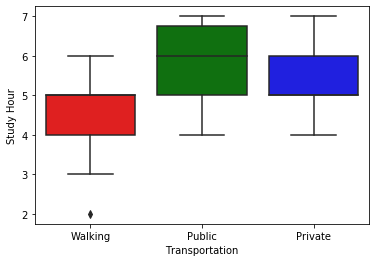

In [15]:
sns.set_palette(['red','green','blue'])
sns.boxplot(x = 'Transportation', y = 'Study Hour', data = transportdf)

In [16]:
for i in transportdf['Transportation'].unique():
    print('Mean of Study Hour Group {}: {}'.format(i,transportdf[transportdf['Transportation'] == i]['Study Hour'].mean()))

Mean of Study Hour Group Walking: 4.4
Mean of Study Hour Group Public: 5.8
Mean of Study Hour Group Private: 5.5


In [17]:
print('Total Study Hour Mean: ', transportdf['Study Hour'].mean())

Total Study Hour Mean:  5.233333333333333


In [18]:
from math import pow
total = 0
for i, j in zip(transportdf['Transportation'], transportdf['Study Hour']):
    total += (pow(((transportdf[transportdf['Transportation'] == i]['Study Hour'].mean()) - j), 2))

In [19]:
print('MSwithin: ',total)

MSwithin:  30.500000000000004


In [20]:
#Importing One-Way ANOVA from Scipy. One-Way ANOVA is called F one-way as well because the test follow the F- Distribution
from scipy.stats import f_oneway
f_oneway(transportdf[transportdf['Transportation'] == 'Walking']['Study Hour'], 
        transportdf[transportdf['Transportation'] == 'Public']['Study Hour'],
        transportdf[transportdf['Transportation'] == 'Private']['Study Hour'])

F_onewayResult(statistic=4.809836065573772, pvalue=0.0163405142361861)

The P-value is lower than our significant level 0.05, it means wehave enough evidence to reject the Null Hypothesis. So,at least one pair of the population are not equal

## Manual Calculation one way Anova

In [21]:
transport = []
method = ['Walking ', 'Public ', 'Private ']
for i in method:
    transport.extend((i*10).split())

In [22]:
transportdf = pd.concat([pd.Series(transport, name = 'Transportation'), 
                     pd.Series([5,4,5,6,5,3,2,4,5,5,7,7,5,6,4,6,5,5,6,7,5,4,5,6,6,5,5,5,7,7], name = 'Study Hour')], axis =1)
transportdf.sample(5)

,Transportation,Study Hour
26,Private,5
6,Walking,2
18,Public,6
19,Public,7
21,Private,4


In [23]:
transportdf

,Transportation,Study Hour
0,Walking,5
1,Walking,4
2,Walking,5
3,Walking,6
4,Walking,5
5,Walking,3
6,Walking,2
7,Walking,4
8,Walking,5
9,Walking,5


In [24]:
transportdf.pivot_table(index = 'Transportation', aggfunc='mean')

,Study Hour
Transportation,
Private,5.5
Public,5.8
Walking,4.4


In [25]:
transportdf['Study Hour'].mean()

5.233333333333333

In [26]:
transportdf['Transportation'].value_counts()

Public     10
Private    10
Walking    10
Name: Transportation, dtype: int64

### MSBeetween

\begin{align}
SS_{between} = \sum_{j=1}^{k} n_j (\bar{x}_{.j}-\bar{x})^2 = n_1 (\bar{x}_{.1}-\bar{x})^2 + n_2 (\bar{x}_{.2}-\bar{x})^2 + n_3 (\bar{x}_{.3}-\bar{x})^2 
\end{align}

\begin{align}
MS_{between} = \frac{SS_{between}} {k-1}
\end{align}

\begin{gather*}
n_1, n_2, n_3 = 10 \\
\bar{x}_{.1}, \bar{x}_{.2}, \bar{x}_{.3} = 5.4, 5.8, 4.4 \\
\bar{x} = 5.2333333.. \\
k =3 
\end{gather*}


\begin{equation}
\begin{split}
SS_{between} & = 10 (5.4-5.23333)^2 + 10 (5.8-5.23333)^2 + 10 (4.4-5.23333)^2 \\
             & = 6.889 + 3.249 + 0.729 \\
             & = 10.876
\end{split}
\end{equation}

\begin{align}
MS_{between} = \frac{10.876} {2} = 5.4335
\end{align}

In [27]:
x_1 = transportdf[transportdf['Transportation']=='Public']['Study Hour'].mean()
x_2 = transportdf[transportdf['Transportation']=='Private']['Study Hour'].mean()
x_3 = transportdf[transportdf['Transportation']=='Walking']['Study Hour'].mean()
n1,n2,n3 = 10,10,10
x_bar = transportdf['Study Hour'].mean()
k = 3

In [28]:
SS_between = n1*(x_1-x_bar)**2 + n2*(x_2-x_bar)**2 + n3*(x_3-x_bar)**2

In [29]:
MS_between = SS_between/(k-1)

In [30]:
MS_between

5.433333333333329

### MSWithin

In [31]:
transportdf

,Transportation,Study Hour
0,Walking,5
1,Walking,4
2,Walking,5
3,Walking,6
4,Walking,5
5,Walking,3
6,Walking,2
7,Walking,4
8,Walking,5
9,Walking,5


In [32]:
transportdf.pivot_table(index = 'Transportation', aggfunc='mean')

,Study Hour
Transportation,
Private,5.5
Public,5.8
Walking,4.4


\begin{align}
SS_{within} = \sum_{i=1}^{n_1} (x_{i1}-\bar{x}_{.1})^2 + \sum_{i=1}^{n_2} (x_{i1}-\bar{x}_{.2})^2 + \sum_{i=1}^{n_3} (x_{i1}-\bar{x}_{.3})^2
\end{align}

\begin{align}
MS_{within} = \frac{SS_{within}}{((n_1-1) + (n_2-1) + (n_3-1))}
\end{align}

\begin{equation}
\begin{split}
SS_{within} & =  (5-5.5)^2 + ... + (7-5.5)^2 + (7-5.8)^2 + ... + (7-5.8)^2 + (5-4.4)^2 + ... + (5-4.4)^2\\
             & = 9.6 + 8.5 + 12.39 \\
             & = 30.5
\end{split}
\end{equation}

\begin{align}
MS_{within} = \frac{30.5}{27} = 1.1296
\end{align}

In [33]:
SS_within = sum([(i-transportdf[transportdf['Transportation']=='Public']['Study Hour'].mean())**2 for i in transportdf[transportdf['Transportation']=='Public']['Study Hour']]) + sum([(i-transportdf[transportdf['Transportation']=='Private']['Study Hour'].mean())**2 for i in transportdf[transportdf['Transportation']=='Private']['Study Hour']]) + sum([(i-transportdf[transportdf['Transportation']=='Walking']['Study Hour'].mean())**2 for i in transportdf[transportdf['Transportation']=='Walking']['Study Hour']])
SS_within

30.5

In [34]:
MS_within = SS_within/27
MS_within

1.1296296296296295

### F Statistics

\begin{align}
F_{stat} = \frac {MS_{between}}{MS_{within}}
\end{align}

In [35]:
F_stat = MS_between/MS_within
F_stat

4.8098360655737675

### Rejection Region

\begin{align}
F_{stat} > F_{\alpha,db_1,db_2}
\end{align}

Critical Value (reject Ho)

\begin{gather}
F_{\alpha,db_1,db_2} \\
alpha = 0.05 \\
db_1 = k-1 \\
db_2 = ((n_1-1) + (n_2-1) + (n_3-1))
\end{gather}

In [38]:
from scipy import stats

In [39]:
print("critical value F_alpha",stats.f.ppf(0.05,2,27))

critical value F_alpha 0.05139086243879718


\begin{align}
F_{stat}  = 4.80983 > F_{\alpha,db_1,db_2} = 0.0513
\end{align}

p-value (reject Ho)

In [40]:
print('p-value',stats.f.sf(F_stat,2,27))

p-value 0.01634051423618613


ANOVA scipy (reject Ho)

In [41]:
#Importing One-Way ANOVA from Scipy. One-Way ANOVA is called F one-way as well because the test follow the F- Distribution
from scipy.stats import f_oneway
f_oneway(transportdf[transportdf['Transportation'] == 'Walking']['Study Hour'], 
        transportdf[transportdf['Transportation'] == 'Public']['Study Hour'],
        transportdf[transportdf['Transportation'] == 'Private']['Study Hour'])

F_onewayResult(statistic=4.809836065573772, pvalue=0.0163405142361861)